<a href="https://colab.research.google.com/github/samipn/autogluon/blob/main/11_tabular_indepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoGluon Tabular In-Depth: Presets, Bagging, Stacking, Importance

*Prepared: 2025-10-14*

In [1]:
# Install
!pip -q install -U autogluon scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.3/487.3 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 106.6 MB/s eta 0:00:0

In [6]:
# Dataset: Breast Cancer (binary)
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
df = X.copy(); df['target'] = y

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

# Stronger training with best_quality; adjust time for Colab T4 vs A100
predictor = TabularPredictor(label='target', eval_metric='roc_auc', path='ag_indepth/')
predictor.fit(train_df, presets='best_quality', time_limit=900)

print('Models trained:', predictor.model_names)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       10.67 GB / 12.67 GB (84.2%)
Disk Space Avail:   179.60 GB / 225.83 GB (79.5%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

Models trained: <bound method TabularPredictor.model_names of <autogluon.tabular.predictor.predictor.TabularPredictor object at 0x7b07c1ca8500>>


In [4]:
print(dir(predictor))

['Dataset', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_assert_is_fit', '_can_calibrate_decision_threshold', '_check_if_hyperparameters_handle_text', '_decision_threshold', '_dynamic_stacking', '_fit', '_fit_extra_kwargs_dict', '_fit_strategy', '_fit_weighted_ensemble_pseudo', '_get_all_fit_extra_args', '_get_dataset', '_initialize_learning_curve_params', '_learner', '_learner_type', '_load', '_load_metadata_file', '_load_version_file', '_model_best', '_post_fit', '_predict_pseudo', '_predictor_log_file_name', '_predictor_metadata_file_name', '_predictor_version_file_name', '_prune_data_features', '_run_pseudolabeling', '_sanitize_dynamic_stacking_kwargs', 

In [7]:
# Leaderboard and info
predictor.leaderboard(val_df, silent=True)


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.995370,0.997461,roc_auc,2.505424,0.592233,128.683927,0.003734,0.000797,0.079382,2,True,11
1,NeuralNetFastAI_BAG_L1,0.994709,0.996471,roc_auc,0.772160,0.125702,55.466440,0.772160,0.125702,55.466440,1,True,8
2,LightGBMXT_BAG_L1,0.994378,0.997214,roc_auc,2.203585,0.050389,40.002887,2.203585,0.050389,40.002887,1,True,1
3,XGBoost_BAG_L1,0.994048,0.993953,roc_auc,0.113370,0.064616,23.034967,0.113370,0.064616,23.034967,1,True,9
4,RandomForestEntr_BAG_L1,0.993386,0.991414,roc_auc,0.076755,0.275701,1.679908,0.076755,0.275701,1.679908,1,True,4
5,ExtraTreesGini_BAG_L1,0.993386,0.993478,roc_auc,0.088521,0.353655,1.301221,0.088521,0.353655,1.301221,1,True,6
6,CatBoost_BAG_L1,0.993386,0.995686,roc_auc,0.122602,0.024702,191.537035,0.122602,0.024702,191.537035,1,True,5
7,NeuralNetTorch_BAG_L1,0.993386,0.994324,roc_auc,0.184735,0.476432,65.566690,0.184735,0.476432,65.566690,1,True,10
8,LightGBM_BAG_L1,0.993056,0.994881,roc_auc,0.063977,0.023586,41.183867,0.063977,0.023586,41.183867,1,True,2
9,RandomForestGini_BAG_L1,0.992725,0.989112,roc_auc,0.078690,0.272081,1.321918,0.078690,0.272081,1.321918,1,True,3


In [8]:
info = predictor.info()
info


{'path': '/content/ag_indepth',
 'label': 'target',
 'random_state': 0,
 'version': '1.4.0',
 'features': ['mean radius',
  'mean texture',
  'mean perimeter',
  'mean area',
  'mean smoothness',
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean symmetry',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'area error',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst radius',
  'worst texture',
  'worst perimeter',
  'worst area',
  'worst smoothness',
  'worst compactness',
  'worst concavity',
  'worst concave points',
  'worst symmetry',
  'worst fractal dimension'],
 'feature_metadata_in': <autogluon.common.features.feature_metadata.FeatureMetadata at 0x7b07c1a75ac0>,
 'time_fit_preprocessing': 0.11354827880859375,
 'time_fit_training': 664.4948954582214,
 'time_fit_total': 664.60844373703,
 'time_limit': 639.62735486030

In [9]:
# Feature importance and a quick plot
fi = predictor.feature_importance(val_df)
fi.head(20)


Computing feature importance via permutation shuffling for 30 features using 114 rows with 5 shuffle sets...
	138.08s	= Expected runtime (27.62s per shuffle set)
	20.08s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
worst smoothness,2.711640e-03,0.001787,0.013725,5,0.006391,-0.000968
worst texture,2.248677e-03,0.004346,0.155823,5,0.011197,-0.006699
fractal dimension error,3.968254e-04,0.000790,0.161970,5,0.002022,-0.001229
worst perimeter,1.322751e-04,0.002682,0.458756,5,0.005655,-0.005391
worst concave points,1.322751e-04,0.003972,0.472110,5,0.008311,-0.008047
concave points error,6.613757e-05,0.000490,0.389025,5,0.001076,-0.000944
worst area,-8.881784e-17,0.002854,0.500000,5,0.005877,-0.005877
mean fractal dimension,-6.613757e-05,0.000790,0.569735,5,0.001559,-0.001692
mean texture,-1.322751e-04,0.002322,0.547609,5,0.004649,-0.004913
symmetry error,-1.322751e-04,0.000645,0.664910,5,0.001195,-0.001460


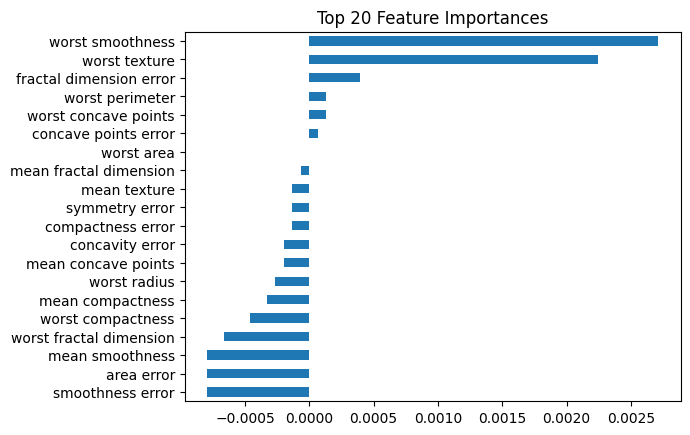

In [10]:
import matplotlib.pyplot as plt
plt.figure()
fi['importance'].head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()
